<a href="https://colab.research.google.com/github/cepdnaclk/e17-4yp-using-machine-learning-in-high-stake-settings/blob/main/Sanity_checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature importance

In [1]:
# Import libraries
import os
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import random
import lime
from lime import lime_tabular

In [2]:
# Function to load the pickle file and return the feature importances
def load_model_and_feat(pkl_model_path):
  # Load the model
  #model = pickle.load(open(pkl_model_path, 'rb'))
  with open(pkl_model_path,"rb") as file_handle:
    model = pickle.load(file_handle)
  # Load the feature importance array
  importance = model.feature_importances_
  # Get the feature names
  feat_names = model.feature_names_in_

  return importance, feat_names


# Function to select the top k features and plot
def select_top_features_and_plot(k, importance, feat_names, title):
  # Create df and sort
  df = pd.DataFrame({"Feature": feat_names,
                  "Importance": importance})
  df_sorted = df.sort_values("Importance", ascending=False).head(k)

  # Plot
  plt.cla()
  plt.barh(df_sorted["Feature"], df_sorted['Importance'], label=title)
  plt.show()

  return df_sorted

# Mean ratio

## One Fold example

Reading the fold 1 test csv file

Concatenating the labels and predictions

Get-rid off unamed and projectID columns

In [3]:
root = "/storage/scratch/e17-4yp-xai/Documents/artefact_backup/backup_1M_inputs_rand_frst/model_outputs/artifacts/random_forest"

In [4]:
test_files = [ 'test_fold_6_2015-05-17.csv' , 'test_fold_5_2015-09-14.csv', 'test_fold_4_2016-01-12.csv', 'test_fold_3_2016-05-11.csv',  'test_fold_2_2016-09-08.csv', 'test_fold_1_2017-01-06.csv']


test_pred = ['test_prediction_fold_6_2015-05-17.csv' , 'test_prediction_fold_5_2015-09-14.csv', 'test_prediction_fold_4_2016-01-12.csv', 'test_prediction_fold_3_2016-05-11.csv', 'test_prediction_fold_2_2016-09-08.csv' , 'test_prediction_fold_1_2017-01-06.csv' ]


In [5]:
fold1 = pd.read_csv(os.path.join(root,'test_fold_1_2017-01-06.csv'))
fold_pred =  fold_pred = pd.read_csv(os.path.join(root, 'test_prediction_fold_1_2017-01-06.csv' ))
Fold1 = pd.concat([fold1, fold_pred["1"]],axis=1)
Fold1 = Fold1.drop(["Unnamed: 0", "Project ID"],axis=1)
Fold1_sort = Fold1.sort_values(["1"],ascending=False)
Fold1_sort.head()

,Project Cost,School Percentage Free Lunch,Teacher Project Posted Sequence,Project Type_Professional Development,Project Type_Student-Led,Project Type_Teacher-Led,Project Subject Category Tree_Applied Learning,"Project Subject Category Tree_Applied Learning, Health & Sports","Project Subject Category Tree_Applied Learning, History & Civics","Project Subject Category Tree_Applied Learning, Literacy & Language",...,School District_Yuma Elem School District 1,School District_Yupiit School District,School District_Zeeland Public Schools,School District_Zion Public School District 6,School District_Zionsville Cmty Sch District,School District_[Bureau Of Indian Affairs],School District_[County Run],School District_[State Run],Label,1
12139,-0.160274,-1.953118,-0.506310,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,1,0.894
16069,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.878
16062,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.878
16064,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.878
16065,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.878


In [6]:
!ls "/storage/scratch/e17-4yp-xai/Documents/artefact_backup/backup_1M_inputs_rand_frst/model_outputs/artifacts/random_forest"

random_forest_fold_1_2017-01-06.pkl  test_prediction_fold_1_2017-01-06.csv
random_forest_fold_2_2016-09-08.pkl  test_prediction_fold_2_2016-09-08.csv
random_forest_fold_3_2016-05-11.pkl  test_prediction_fold_3_2016-05-11.csv
random_forest_fold_4_2016-01-12.pkl  test_prediction_fold_4_2016-01-12.csv
random_forest_fold_5_2015-09-14.pkl  test_prediction_fold_5_2015-09-14.csv
random_forest_fold_6_2015-05-17.pkl  test_prediction_fold_6_2015-05-17.csv
test_fold_1_2017-01-06.csv	     train_fold_1_2017-01-06.csv
test_fold_2_2016-09-08.csv	     train_fold_2_2016-09-08.csv
test_fold_3_2016-05-11.csv	     train_fold_3_2016-05-11.csv
test_fold_4_2016-01-12.csv	     train_fold_4_2016-01-12.csv
test_fold_5_2015-09-14.csv	     train_fold_5_2015-09-14.csv
test_fold_6_2015-05-17.csv	     train_fold_6_2015-05-17.csv


In [11]:
# Function to load the pickle file and return the feature importances
def load_model(pkl_model_path):
  # Load the model
  #model = pickle.load(open(pkl_model_path, 'rb'))
    with open(pkl_model_path,"rb") as file_handle:
        model = pickle.load(file_handle)
  # Load the feature importance array
#   importance = model.feature_importances_
  # Get the feature names
#   feat_names = model.feature_names_in_

    return model

In [34]:
def get_lime_explanation(x_train, x_test, top_instance_loc_list, bottom_instance_loc_list, class_names, mode, model, model_name):

    #! take the list of instances and save the explaination of each instance.
    # LIME: define the explainer
    # Ex: mode = 'classification' or 'regression'
    #     class_names = ['0', '1']
    
    categorical_feature_names = x_train.dtypes[x_train.dtypes==bool].index.to_list()
    categorical_feature_index = [x_train.columns.get_loc(col) for col in categorical_feature_names]

    explainer_lime = lime_tabular.LimeTabularExplainer(
        training_data=np.array(x_train),
        feature_names=x_train.columns,
        categorical_features = categorical_feature_index,
#         categorical_names = categorical_feature_names,
        class_names=class_names,
        mode=mode
    )
    
    
    for instance_loc in top_instance_loc_list:
        # Select instance and explain
        instance = x_test.iloc[instance_loc]
        exp = explainer_lime.explain_instance(
            data_row=instance,
            predict_fn=model.predict_proba,
            num_features=20
        )
        
        exp.as_pyplot_figure()
        plt.show()
        # Save the explanation as a figure
#         save_lime_explanation(exp, instance_loc, model_name, "top")
        
    for instance_loc in bottom_instance_loc_list:
        # Select instance and explain
        instance = x_test.iloc[instance_loc]
        exp = explainer_lime.explain_instance(
            data_row=instance,
            predict_fn=model.predict_proba,
            num_features=20
        )
        exp.as_pyplot_figure()
        plt.show()
        # Save the explanation as a figure
#         save_lime_explanation(exp, instance_loc, model_name, "bottom")

    return exp



In [35]:
model = load_model(os.path.join(root, "random_forest_fold_1_2017-01-06.pkl"))


/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [36]:
x_train = pd.read_csv(os.path.join(root,"train_fold_1_2017-01-06.csv"))


In [37]:
x_test = Fold1_sort.drop([ "Label", "1"],axis=1)

In [38]:
x_train_cleaned = x_train.drop(["Unnamed: 0", "Project ID", "Label"], axis=1)

In [39]:
x_train_cleaned.head()

,Project Cost,School Percentage Free Lunch,Teacher Project Posted Sequence,Project Type_Professional Development,Project Type_Student-Led,Project Type_Teacher-Led,Project Subject Category Tree_Applied Learning,"Project Subject Category Tree_Applied Learning, Health & Sports","Project Subject Category Tree_Applied Learning, History & Civics","Project Subject Category Tree_Applied Learning, Literacy & Language",...,School District_Yuba City Unif School District,School District_Yukon School District I-27,School District_Yuma Elem School District 1,School District_Yupiit School District,School District_Zeeland Public Schools,School District_Zion Public School District 6,School District_Zionsville Cmty Sch District,School District_[Bureau Of Indian Affairs],School District_[County Run],School District_[State Run]
0,-0.413949,-1.996134,-0.394964,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.526127,-1.996134,-0.394964,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.526127,-1.996134,-0.394964,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.526127,-1.996134,-0.394964,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.631239,-1.867087,-0.522216,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
x_test.head()

,Project Cost,School Percentage Free Lunch,Teacher Project Posted Sequence,Project Type_Professional Development,Project Type_Student-Led,Project Type_Teacher-Led,Project Subject Category Tree_Applied Learning,"Project Subject Category Tree_Applied Learning, Health & Sports","Project Subject Category Tree_Applied Learning, History & Civics","Project Subject Category Tree_Applied Learning, Literacy & Language",...,School District_Yuba City Unif School District,School District_Yukon School District I-27,School District_Yuma Elem School District 1,School District_Yupiit School District,School District_Zeeland Public Schools,School District_Zion Public School District 6,School District_Zionsville Cmty Sch District,School District_[Bureau Of Indian Affairs],School District_[County Run],School District_[State Run]
12139,-0.160274,-1.953118,-0.506310,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16069,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16062,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16064,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16065,-0.313587,-1.824071,0.463986,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
top_instance_loc_list = random.sample(range(1000), 50)
bottom_instance_loc_list = random.sample(range(x_test.shape[0]-1000 , x_test.shape[0]), 50)

In [42]:

# x_test.columns.get_loc(["Project Type_Professional Development","Project Type_Student-Led"])


In [43]:
import numpy as np

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


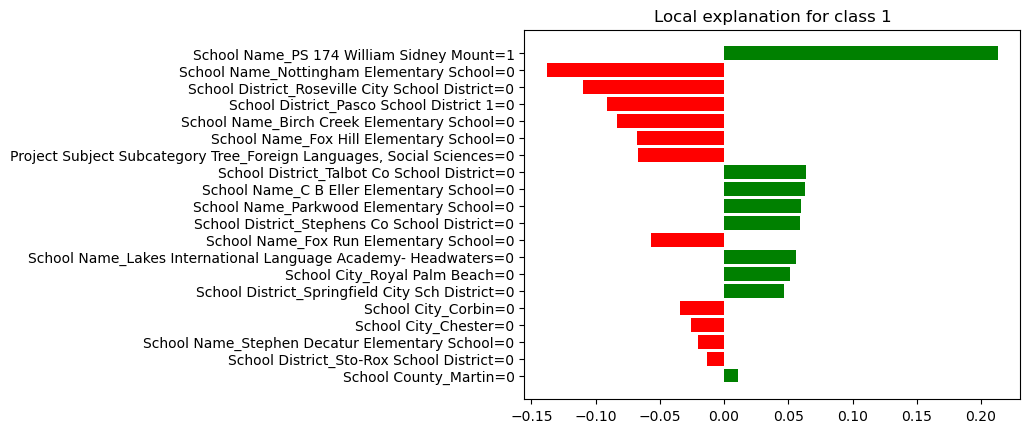

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


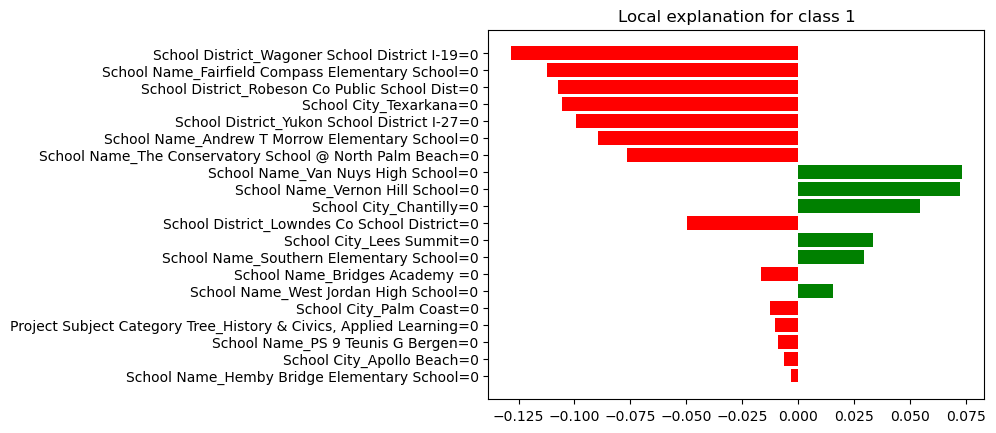

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


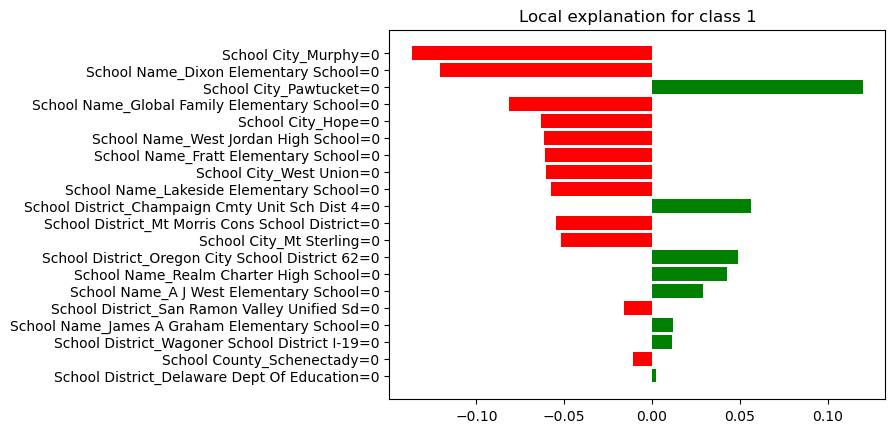

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


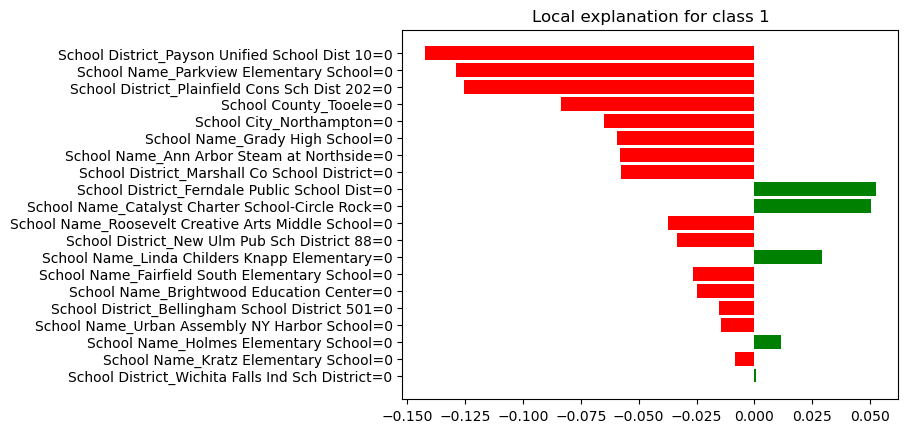

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


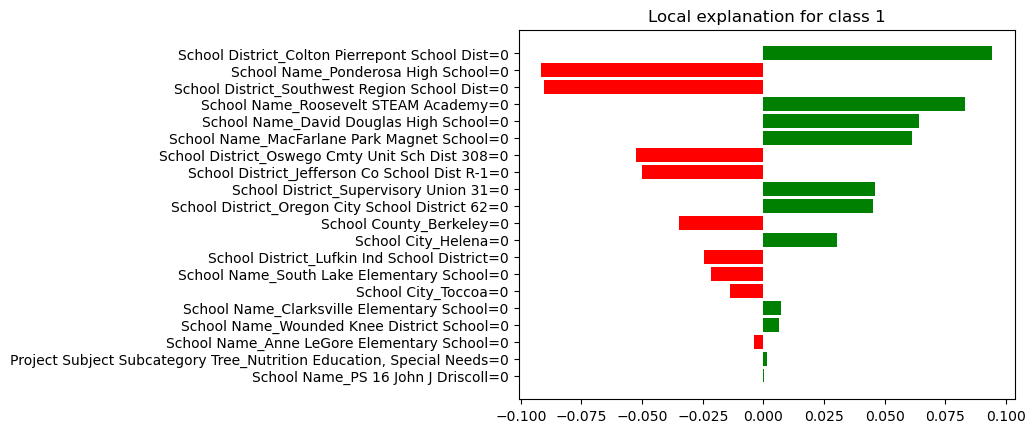

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


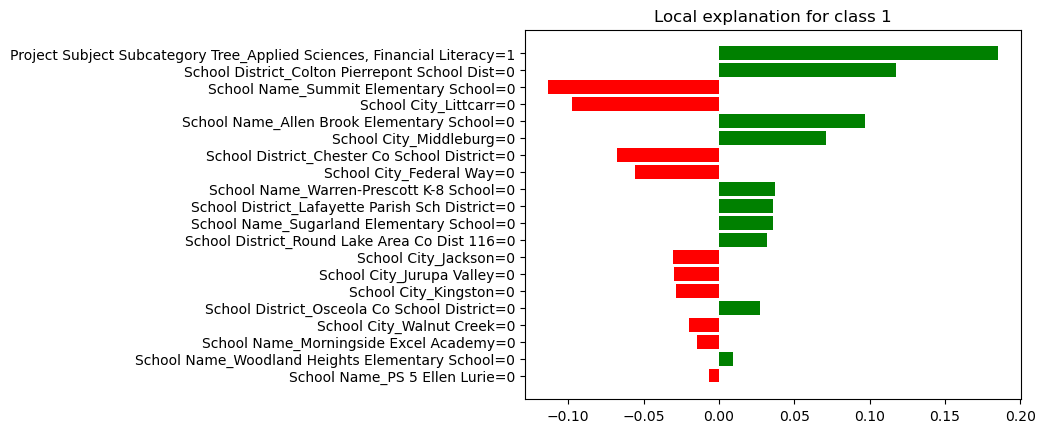

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


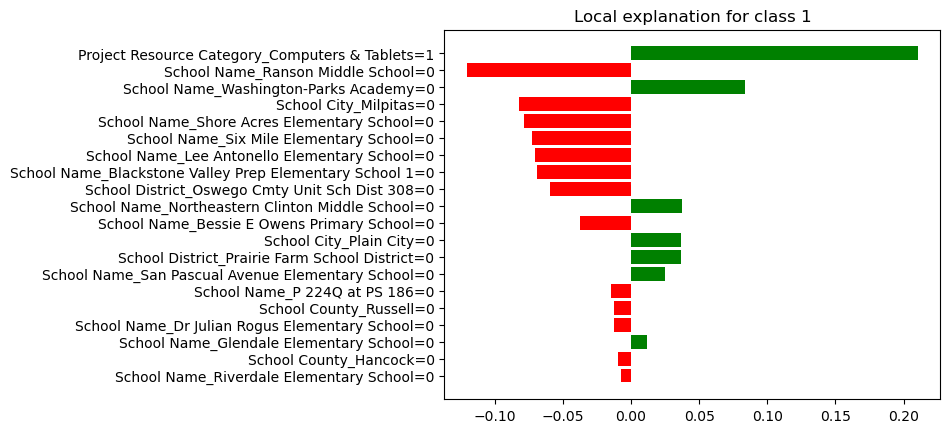

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


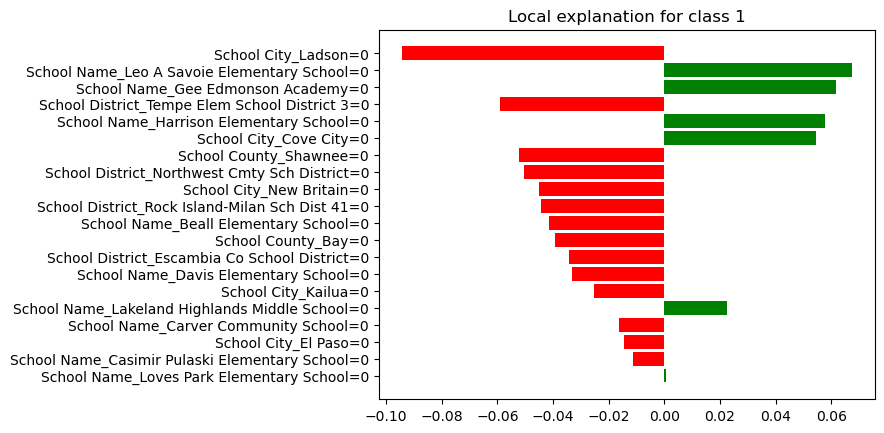

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


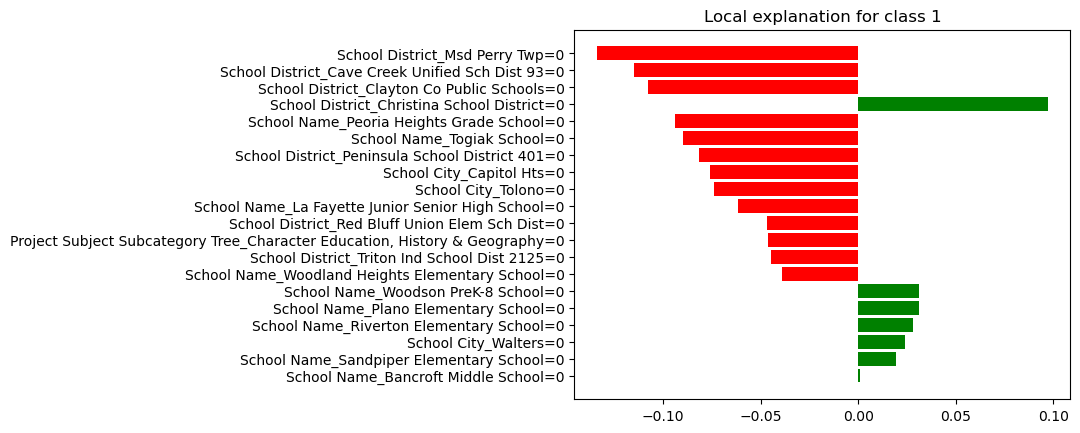

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


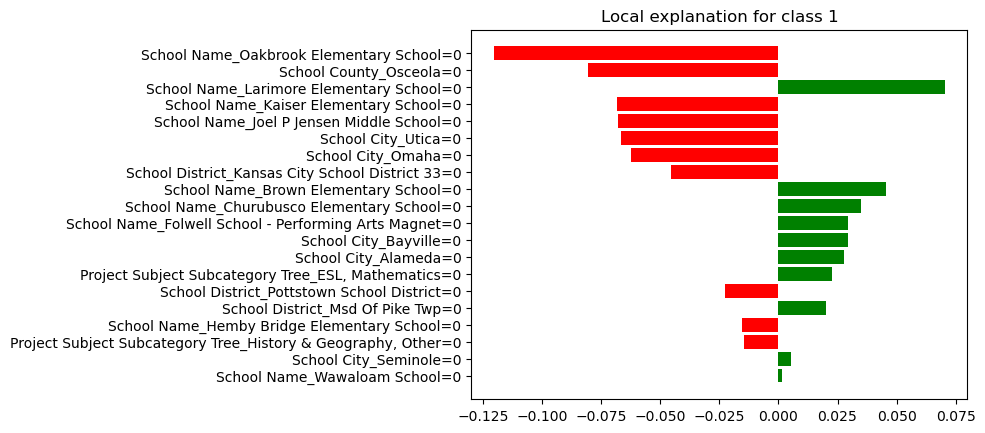

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


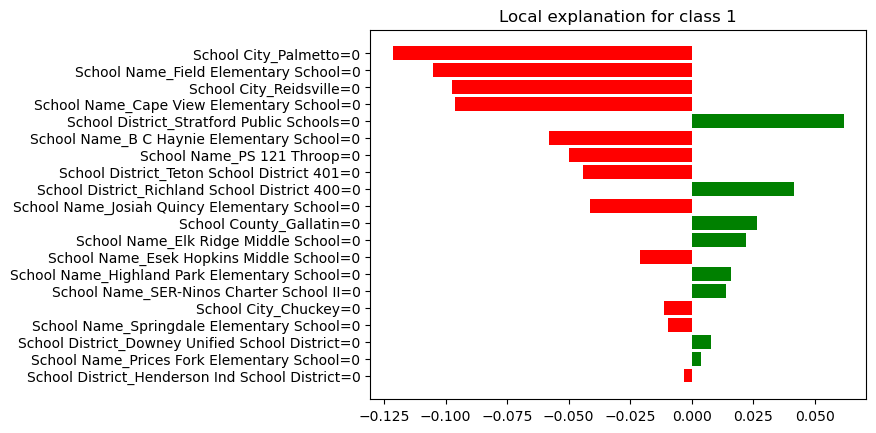

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


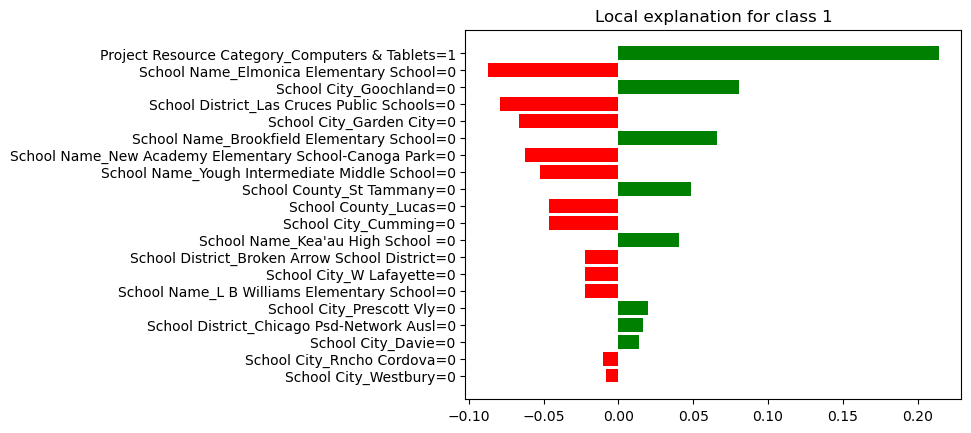

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


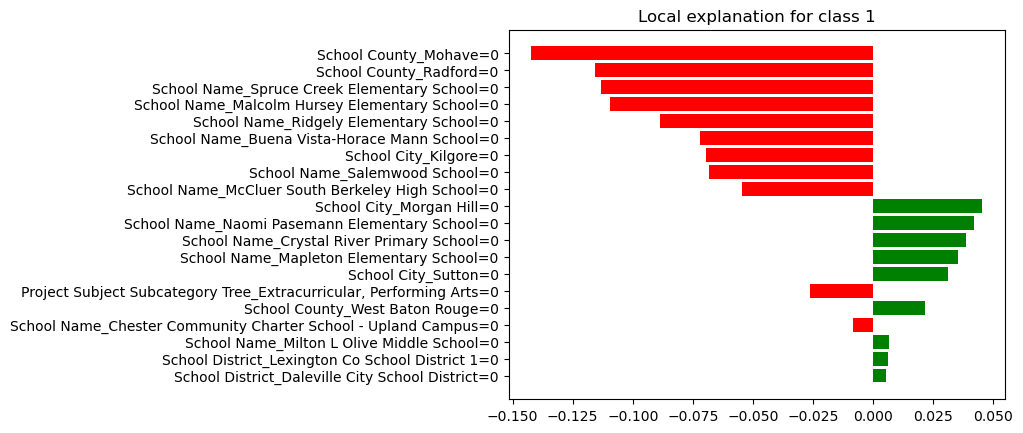

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


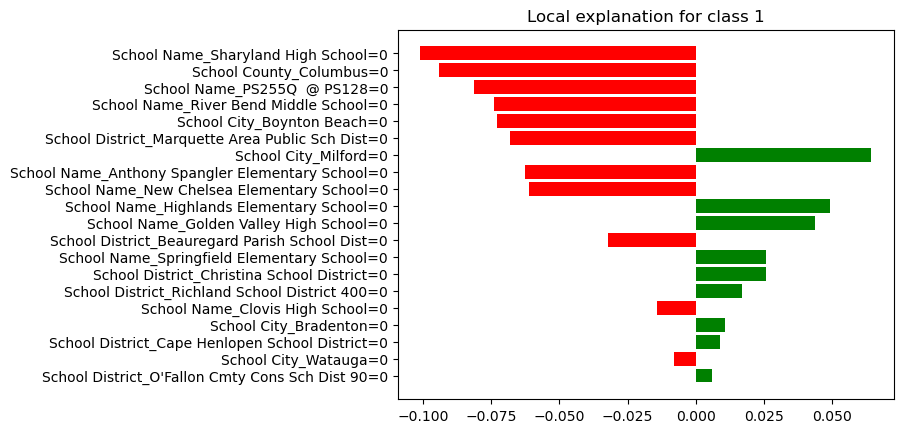

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


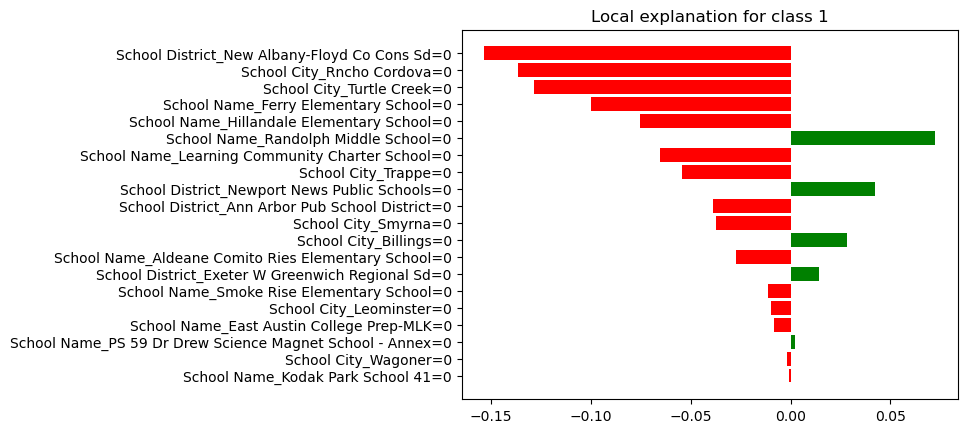

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


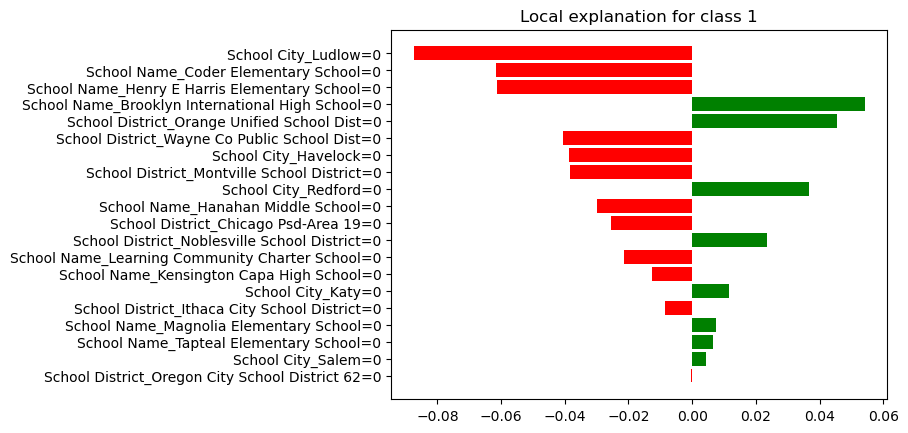

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


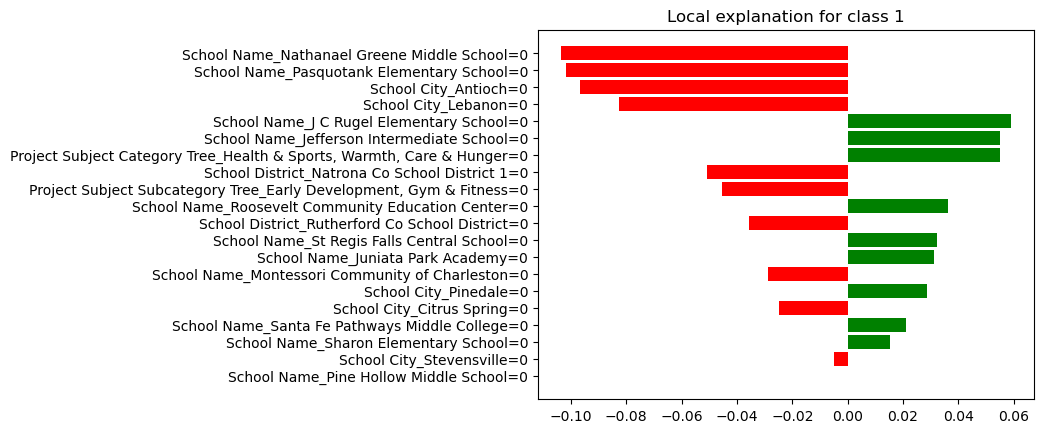

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


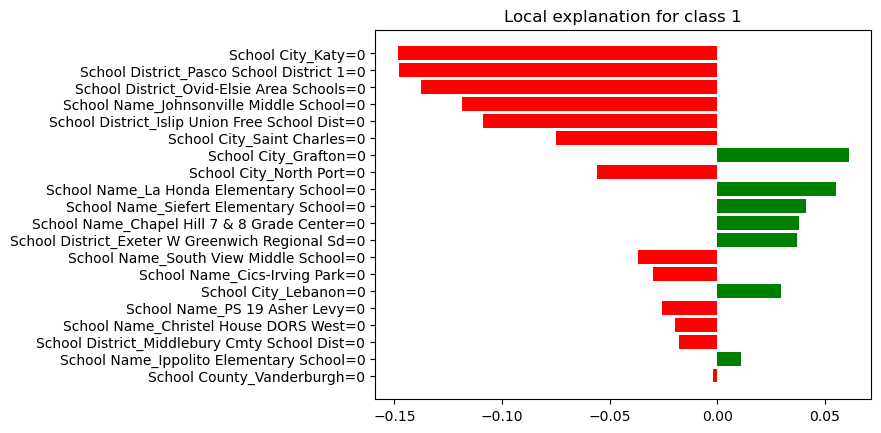

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


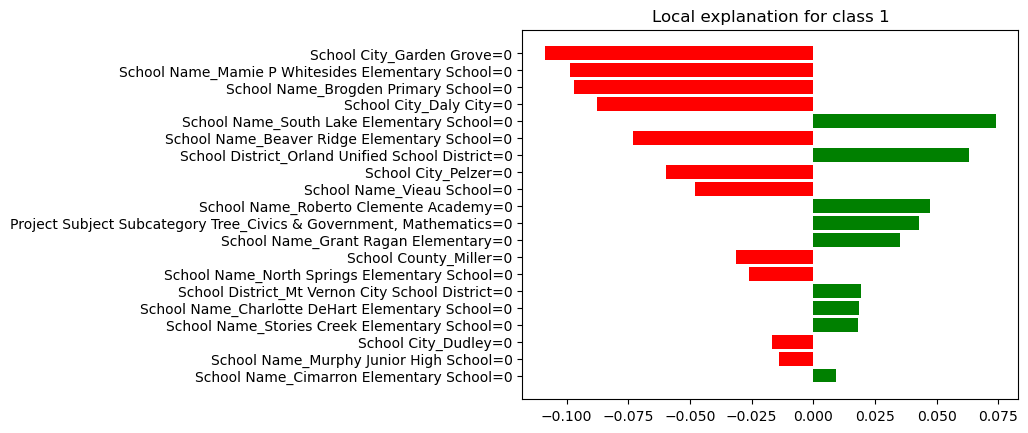

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


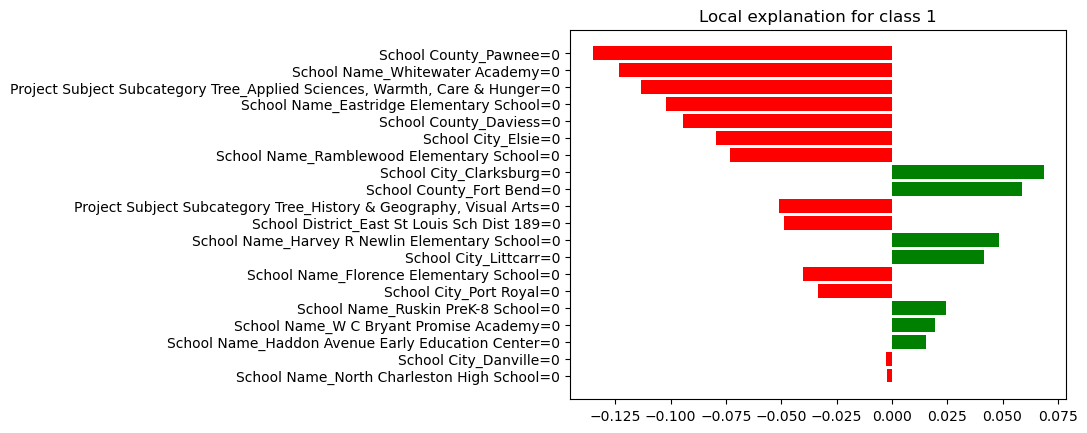

/storage/scratch/e17-4yp-xai/anaconda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
get_lime_explanation(x_train_cleaned, x_test, top_instance_loc_list, bottom_instance_loc_list, ["0", "1"], "classification", model, "random_forest")